In [5]:
import os
import sys

path_to_scr_folder=os.path.join(os.path.dirname(os.path.abspath('')), 'src')
sys.path.append(path_to_scr_folder)

In [6]:
# TODO: change all the paths to the correct ones
INPUT_DIR = '/home/ahassayoune/swpa_test'
REF_FILENAME = 'G0-1-300123.cdf'
TARGETS_SUBDIR = 'targets'

In [7]:
print(f"Reference file: {os.path.join(INPUT_DIR, REF_FILENAME)}")
print(f"Targets directory: {os.listdir(os.path.join(INPUT_DIR, TARGETS_SUBDIR))}")

Reference file: /home/ahassayoune/swpa_test/G0-1-300123.cdf
Targets directory: ['G0-1-250123.cdf']


In [8]:
from swpa_peak_alignment import swpa_peak_alignment

matches = swpa_peak_alignment(INPUT_DIR, REF_FILENAME, TARGETS_SUBDIR, mod_time=1.7)

print("\nNumber of matches found: ", len(matches))
matches.head(10)

chromato read 2.9153997898101807 s
--- 43.25974988937378 seconds --- to compute full spectra centroid
full spectra computed 44.40678143501282 s
baseline corrected
Converted reference chromatogram to CSV
chromato read 5.819903612136841 s
--- 72.15035939216614 seconds --- to compute full spectra centroid
full spectra computed 73.17703747749329 s
baseline corrected
Converted 1/1 chromatograms to CSV

Scheduling SWPA script with the following arguments:
	- Output directory: /tmp/tmp5hy8p4an/2025-01-09_16-58-04_out
	- Reference: /tmp/tmp5hy8p4an/G0-1-300123.csv
	- Targets: ['/tmp/tmp5hy8p4an/G0-1-250123.csv']

[1] "Received Arguments:"
[1] "   - Output directory: /tmp/tmp5hy8p4an/2025-01-09_16-58-04_out"
[1] "   - Reference: /tmp/tmp5hy8p4an/G0-1-300123.csv"
[1] "   - Targets:  /tmp/tmp5hy8p4an/G0-1-250123.csv"
[1] "Target Path:"
[1] "/tmp/tmp5hy8p4an/G0-1-250123.csv"

Number of matches found:  412


,filename,tt1,tt2,tp1,tp2,rt1,rt2,rp1,rp2,sim,dist,tid,rid,combined_sim_dist
10,G0-1-250123,8.50000,0.602956,0,72,8.500000,0.602956,0,72,0.995080,1.000000,11,13,1.990730
9,G0-1-250123,8.50000,0.485714,0,58,8.500000,0.519212,0,62,0.995996,0.967588,10,12,1.956550
4,G0-1-250123,8.50000,0.242857,0,29,8.500000,0.293103,0,35,0.995615,0.952158,5,7,1.938601
11,G0-1-250123,8.50000,0.703448,0,84,8.500000,0.636453,0,76,0.994744,0.937211,12,14,1.920185
7,G0-1-250123,8.50000,0.368473,0,44,8.500000,0.452217,0,54,0.994918,0.922727,8,10,1.904428
5,G0-1-250123,8.50000,0.267980,0,32,8.500000,0.368473,0,44,0.994491,0.908684,6,8,1.887928
3,G0-1-250123,8.50000,0.142365,0,17,8.500000,0.251232,0,30,0.995187,0.901821,4,6,1.881721
170,G0-1-250123,50.63055,0.427094,1488,51,50.715491,0.326601,1491,39,0.997405,0.883719,326,181,1.866134
160,G0-1-250123,50.23416,0.477340,1474,57,50.319101,0.376847,1477,45,0.997320,0.883719,316,171,1.865959
167,G0-1-250123,51.59321,0.125616,1522,15,51.678151,0.025123,1525,3,0.997278,0.883719,323,178,1.865872


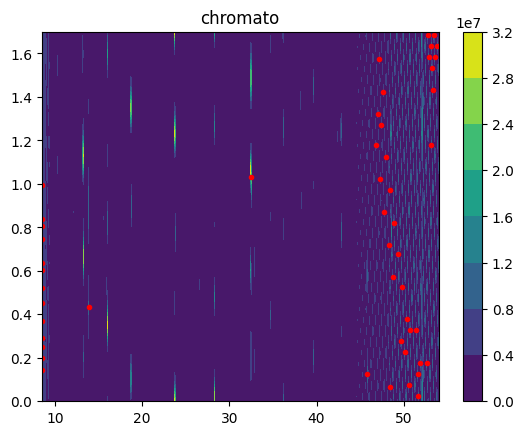

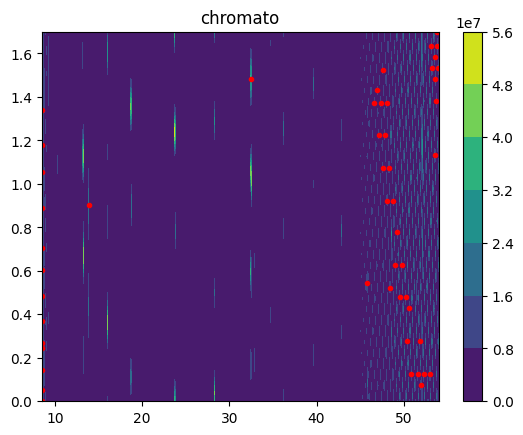

In [15]:
import plot
from read_chroma import read_only_chroma

chromato1, time_rn1= read_only_chroma(os.path.join(INPUT_DIR, REF_FILENAME), mod_time = 1.7)
chromato2, time_rn2= read_only_chroma(os.path.join(INPUT_DIR, TARGETS_SUBDIR, 'G0-1-250123.cdf'), mod_time = 1.7)

coordinates1 = matches[['rt1', 'rt2']].values[:50]
coordinates2 = matches[['tt1', 'tt2']].values[:50]

plot.visualizer((chromato1, time_rn1), title="chromato", log_chromato=False, points=coordinates1, mod_time=1.7)
plot.visualizer((chromato2, time_rn2), title="chromato", log_chromato=False, points=coordinates2, mod_time=1.7)